In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [9]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [10]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [11]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [12]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [13]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

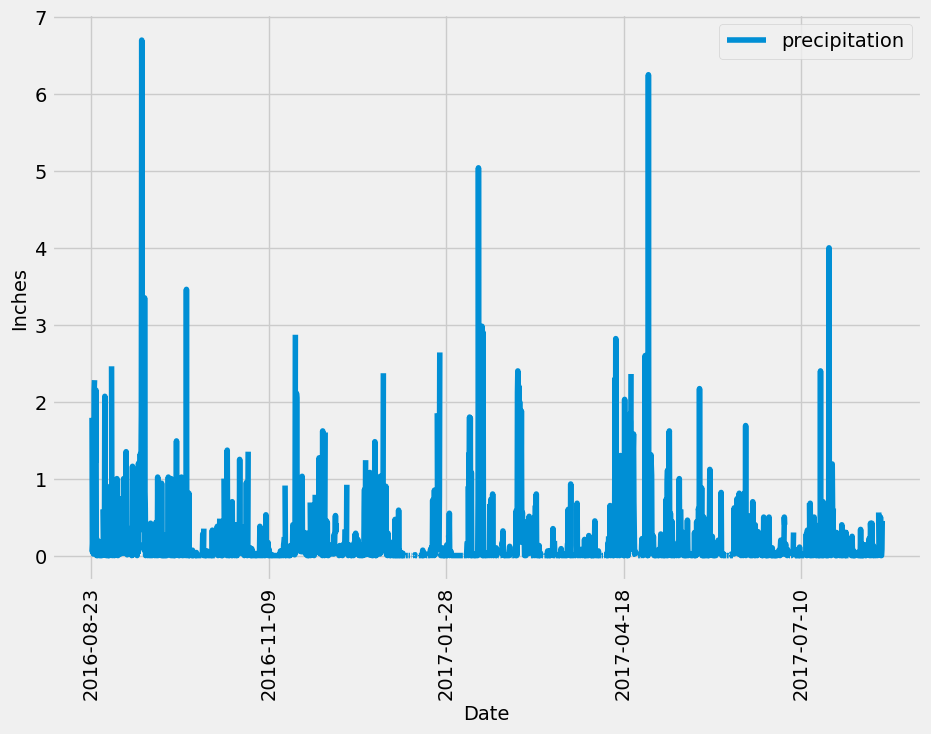

In [53]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
last_year = dt.date(2017,8,23) - dt.timedelta(days = 365)

# Perform a query to retrieve the data and precipitation scores
precip = session.query(measurement.date, measurement.prcp)\
                .filter(measurement.date >= last_year).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precip_data = pd.DataFrame(precip, columns = ['date', 'prcp']).set_index('date')

# Sort the dataframe by date
precip_data = precip_data.sort_values('date')

# Use Pandas Plotting with Matplotlib to plot the data
precip_data.plot(figsize = (10,7), rot = 90)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.legend(['precipitation'])
plt.show()

In [34]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_data.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [35]:
# Design a query to calculate the total number of stations in the dataset
session.query(station).count()

9

In [38]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
stations = session.query(measurement.station, func.count(measurement.station)).\
                                                 group_by(measurement.station).\
                                                 order_by(func.count(measurement.station).desc()).all()
stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [41]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station_temp = session.query(func.min(measurement.tobs), func.max(measurement.tobs),\
               func.avg(measurement.tobs)).filter(measurement.station=='USC00519281').all()
station_temp

[(54.0, 85.0, 71.66378066378067)]

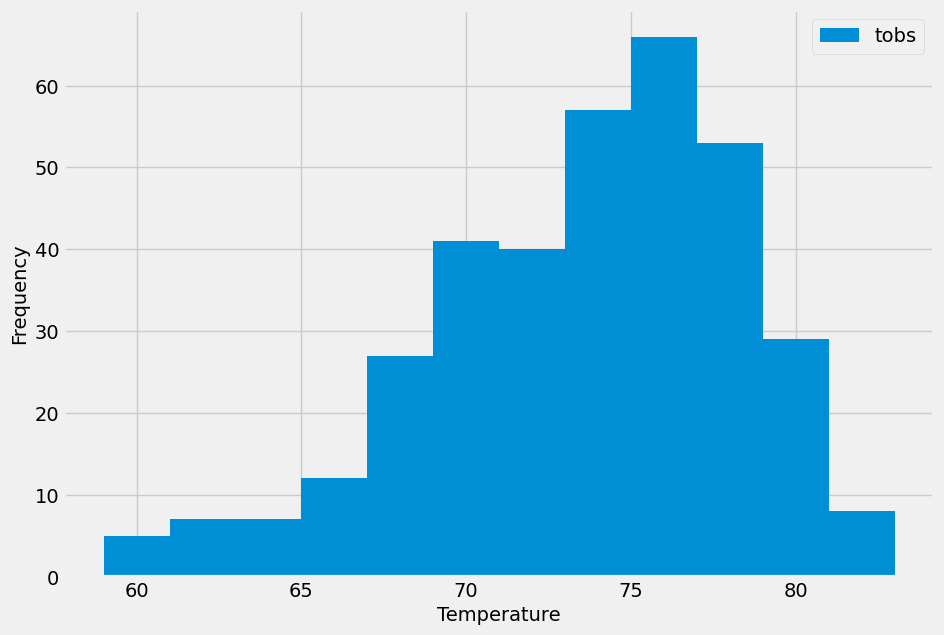

In [45]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_station = session.query(measurement.tobs).filter(measurement.station == 'USC00519281').\
                            filter(measurement.date >= last_year).all()

active_station_df = pd.DataFrame(most_active_station)

active_station_df.plot(kind = 'hist', figsize = (10,7), bins = 12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend(['tobs'])
plt.show()

# Close Session

In [46]:
# Close Session
session.close()